In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

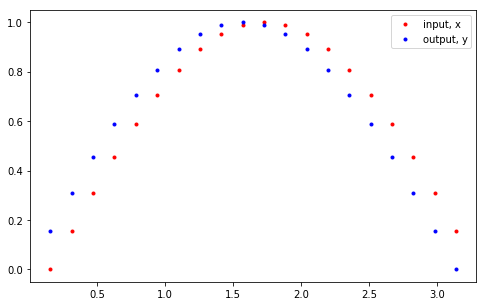

In [2]:
plt.figure(figsize=(8,5))

seq_length = 20

time_steps = np.linspace(0,np.pi,seq_length +1)
data = np.sin(time_steps)
data.resize((seq_length + 1, 1))

x = data[:-1]
y = data[1:]

plt.plot(time_steps[1:],x, 'r.', label = "input, x")
plt.plot(time_steps[1:], y, 'b.', label = "output, y")

plt.legend(loc='best')
plt.show()

In [3]:
# Define A RNN

class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()
        self.hidden_dim = hidden_dim
        
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_size)
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        r_out, hidden = self.rnn(x,hidden)
        r_out = r_out.view(-1,self.hidden_dim)
        return self.fc(r_out), hidden

In [4]:
# model

input_size = 1
output_size = 1
hidden_dim = 32
n_layers = 1

rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [5]:
# Loss and Optimization
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(),lr=0.01)

In [6]:
def train(rnn, n_steps, print_every):
    
    hidden = None
    
    for batch_i, step in enumerate(range(n_steps)):
        data = np.sin(np.linspace(step * np.pi, (step+1)*np.pi , seq_length + 1 ))
        data.resize((seq_length + 1 , 1))
        x = data[:-1]
        y = data[1:]
        
        x_t = torch.Tensor(x).unsqueeze(0)
        y_t = torch.Tensor(y)
        
        predict, hidden = rnn(x_t, hidden)
        
        hidden = hidden.data
        
        loss = criterion(predict, y_t)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch_i % print_every == 0:
            print ("Loss",loss.item())
            plt.plot(time_steps[1:],x,'r.')
            plt.plot(time_steps[1:],predict.data.numpy().flatten(),'b.')
            plt.show()
        
    return rnn

Loss 0.7061195969581604


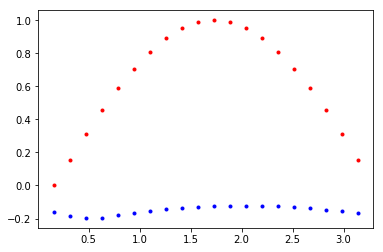

Loss 0.010031087324023247


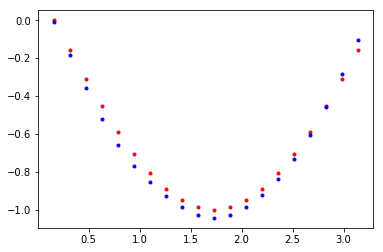

Loss 0.07535012066364288


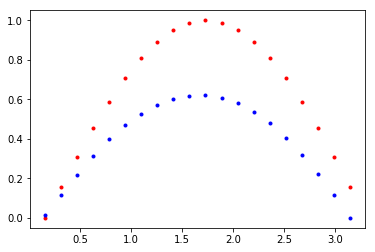

Loss 0.01721363142132759


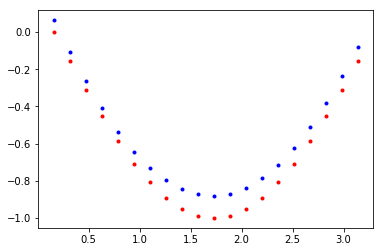

Loss 0.001713717938400805


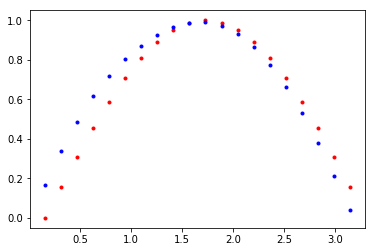

In [7]:
trained_rnn = train(rnn,n_steps=75, print_every=15)